In [1]:
import numpy as np
import tensorflow as tf

2023-01-26 07:13:17.483621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 07:13:17.591406: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


랜덤시드값 설정

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

데이터 불러오기_mnist dataset

In [3]:
from tensorflow.keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [4]:
# original data의 차원 확인
# (이미지 개수, 행, 열)의 feature data  [target data]
print(X_train0.shape, y_train0)
print(X_test0.shape, y_test0)

(60000, 28, 28) [5 0 4 ... 5 6 8]
(10000, 28, 28) [7 2 1 ... 4 5 6]


Original Data 시각화

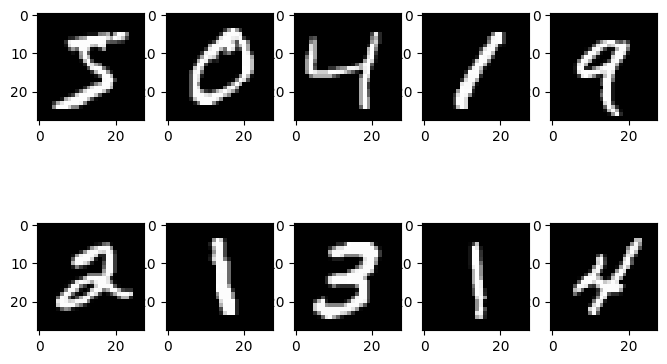

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))      # 출력될 plot의 size를 설정

for i in range(2*5):    # 수많은 data를 모두 출력할 수 없으니 이미지 10개만 확인
    plt.subplot(2, 5, i+1)  # subplot 설정
    plt.imshow(X_train0[i].reshape((28, 28)), cmap = 'gray')

plt.show()

target class 확인

In [6]:
set(y_train0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

feature data(channel 추가), scale 조정

In [7]:
# channel을 추가해주고 픽셀은 0~255에 분포해서 최댓값이 1이 되도록 조정
X_train = (X_train0.reshape(60000, 28, 28, 1)) / 255
X_test = (X_test0.reshape(10000, 28, 28, 1)) / 255

print(X_train.shape, X_test.shape, sep = "\n")

(60000, 28, 28, 1)
(10000, 28, 28, 1)


target  One-hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0)
y_test = to_categorical(y_test0)

CNN (합성곱 신경망) 생성

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_train0))    # n_class = 10로 최종출력층에서 사용

# Conv2D로 합성층 추가, 32의 출력이미지, input의 차원을 입력
# padding = 'valid'는 padding을 하지 않겠다는 의미
# padding = 'same'은 padding을 입력데이터의 크기와 동일하게 조정

input = Input(shape=(28, 28, 1))
x = Conv2D(32, (5,5), padding='valid', activation='relu')(input)
x = MaxPool2D((2,2))(x) #pooling size 설정
x = Dropout(0.25)(x)    # 사용하지 않을 노드의 비율(0.25)
x = Flatten()(x)        # 최종 output형태를 고려, 행렬을 Flatten()으로 vector로 펼친다.

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(n_class, activation='softmax')(x) # 활성화 함수를 softmax로 설정해 최종 출력층을 구한다.(n_class)

model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                             

2023-01-26 07:13:28.368258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 07:13:28.370900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 07:13:28.371215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 07:13:28.371777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

model 컴파일

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

학습 진행

In [11]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100


2023-01-26 07:13:33.561500: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


600/600 [==============================] - 3s 3ms/step - loss: 0.1600 - accuracy: 0.9515
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0594 - accuracy: 0.9812
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0349 - accuracy: 0.9886
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9951
E

model 평가

In [12]:
print(model.evaluate(X_train, y_train, batch_size=100)[1])
print(model.evaluate(X_test, y_test, batch_size=100)[1])

600/600 [==============================] - 1s 1ms/step - loss: 4.0145e-05 - accuracy: 1.0000
0.9999833106994629
100/100 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9925
0.9925000071525574


오답 데이터 확인

In [13]:
y_pred_hot = model.predict(X_test)
print(y_pred_hot[0])

313/313 [==============================] - 0s 997us/step
[0.0000000e+00 1.9633432e-29 5.7771904e-38 4.1861406e-35 3.0614707e-32
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.7592566e-31]


In [14]:
import numpy as np

# 위를 출력값에서 예측값이 원-핫인코딩 형태임을 확인할 수 있었다.
# 따라서 np.argmax()로 원-핫인코딩형태를 원래 숫자로 쉽게 바꿀 수 있다.
y_pred = np.argmax(y_pred_hot, axis=1)
y_pred  # 결과를 보면 본래의 숫자로 돌아온 것을 알 수 있다.

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
diff = y_test0 - y_pred     #실제값과 예측값의 차이를 구한다.
diff_idx = []

# (예측을 잘 해서 같다면 0, 다르다면 1이 나올 것)
for i in range(len(y_test0)):
    if (diff[i] != 0):
        diff_idx.append(i)

오답데이터 시각화

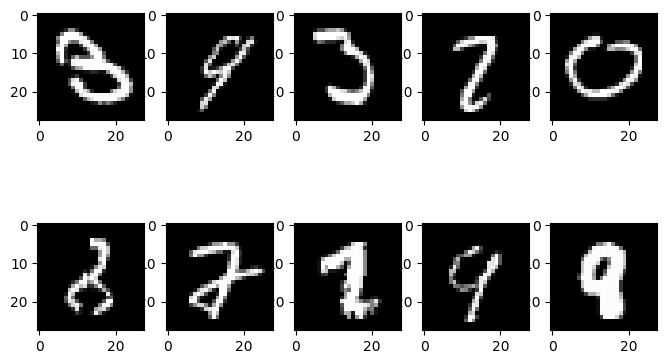

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    idx = diff_idx[i]
    plt.imshow(X_test0[idx].reshape(28, 28), cmap='gray')
plt.show()
# 결과를 통해 육안으로도 숫자를 구분하기 어려운 데이터임을 알 수 있다.